<a href="https://colab.research.google.com/github/asadian98/Deep-Learning-Course-EE25647/blob/HW3%2FQ3%2Fbefore-tokenizer/HW3/HW3_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download Data from Kaggle

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd drive/MyDrive/

Mounted at /content/drive
/content/drive/MyDrive


In [2]:
! pip install -q kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"amirhosseinasadian","key":"9e5281fbe49380631b6c0b1b6a11a5d8"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d adityajn105/flickr8k

!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: Images/2845246160_d0d1bbd6f0.jpg  
  inflating: Images/2845691057_d4ab89d889.jpg  
  inflating: Images/2845845721_d0bc113ff7.jpg  
  inflating: Images/2846037553_1a1de50709.jpg  
  inflating: Images/2846785268_904c5fcf9f.jpg  
  inflating: Images/2846843520_b0e6211478.jpg  
  inflating: Images/2847514745_9a35493023.jpg  
  inflating: Images/2847615962_c330bded6e.jpg  
  inflating: Images/2847859796_4d9cb0d31f.jpg  
  inflating: Images/2848266893_9693c66275.jpg  
  inflating: Images/2848571082_26454cb981.jpg  
  inflating: Images/2848895544_6d06210e9d.jpg  
  inflating: Images/2848977044_446a31d86e.jpg  
  inflating: Images/2849194983_2968c72832.jpg  
  inflating: Images/2850719435_221f15e951.jpg  
  inflating: Images/2851198725_37b6027625.jpg  
  inflating: Images/2851304910_b5721199bc.jpg  
  inflating: Images/2851931813_eaf8ed7be3.jpg  
  inflating: Images/2852982055_8112d0964f.jpg  
  inflating: Images/285306009_f6ddabe

In [4]:
import glob
import numpy as np
import pandas as pd

img_files = glob.glob('Images/*.jpg',recursive=True)
print(f'Total images in archive : {len(img_files)}')

Total images in archive : 8091


In [5]:
cap_df = pd.read_csv('captions.txt')
print(f'Total Captions in file : {cap_df.shape[0]}')
cap_df.head()

Total Captions in file : 40455


,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [6]:
from collections import defaultdict

image_path_to_caption = defaultdict(list)
for idx, row in cap_df.iterrows():
    caption = row.caption
    im_path = row['image'][:-4]
    image_path_to_caption[im_path].append(caption)
print(f"Total captions present in the dataset: {len(cap_df['caption'])}")
print(f"Total images present in the dataset: {len(img_files)}")

Total captions present in the dataset: 40455
Total images present in the dataset: 8091


In [7]:
image_path_to_caption['1000268201_693b08cb0e']

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

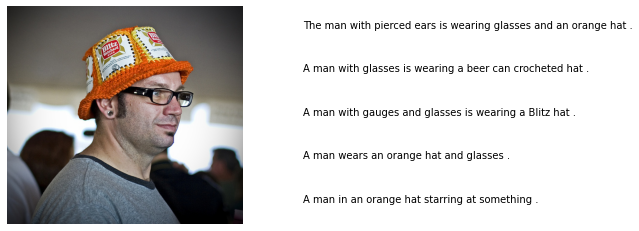

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

image_paths = list(image_path_to_caption.keys())
all_captions = []
img_name_vector = []
for image_path in image_paths:
    caption_list = image_path_to_caption[image_path]
    all_captions.extend(caption_list)
    img_name_vector.extend([image_path] * len(caption_list))

f, axes = plt.subplots(1, 2)
plt.axis('off')
f.set_figwidth(10)
image_num = 20
axes[0].imshow(io.imread('Images/' + img_name_vector[image_num] + '.jpg'))
axes[0].axis('off')
axes[1].set_ylim(0,5)
for i in range(image_num,image_num+5):
    axes[1].text(0,i+0.5-image_num,all_captions[i])

In [9]:
import string
import re

def preprocessing(my_dict):
    for key, cap_list in my_dict.items():
        for i in range(len(cap_list)):
            cap = cap_list[i]
            cap = re.sub('[()!?]', ' ', cap)  # remove punctuations
            cap = re.sub('\[.*?\]',' ', cap)  # remove punctuations
            cap = re.sub("[^a-z0-9]"," ", cap)# non-alphanumeric characters
            cap = cap.split()
            cap = [word.lower() for word in cap]
            cap = [word for word in cap if len(word)>1]
            cap = [word for word in cap if word.isalpha()]
            cap_list[i] =  ' '.join(cap)

preprocessing(image_path_to_caption)

In [10]:
image_path_to_caption['1000268201_693b08cb0e']

['child in pink dress is climbing up set of stairs in an entry way',
 'girl going into wooden building',
 'little girl climbing into wooden playhouse',
 'little girl climbing the stairs to her playhouse',
 'little girl in pink dress going into wooden cabin']

In [11]:
# save captions for cash problem
lines = list()
for key, cap_list in image_path_to_caption.items():
  for cap in cap_list:
    lines.append(key + ' ' + cap)
data = '\n'.join(lines)
file = open('clean_captions.txt', 'w')
file.write(data)
file.close()

Vocabulary Size =  1994


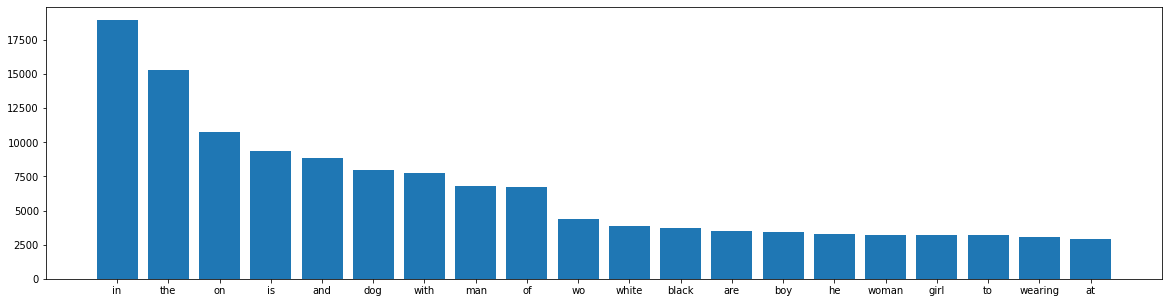

In [21]:
from collections import Counter

def to_vocabulary(captions):
  cap_list = []
  for key in captions.keys():
    for j in range(5):
      cap_list.extend(captions[key][j].split())
  my_list = Counter(cap_list)
  vocab_list = [d for d in my_list.keys() if my_list[d] >= 10]
  
  # Get top 20 words by frequency.
  vals = sorted(my_list.items(),key=lambda x:x[1],reverse=True)
  words = [x[0] for x in vals[:20]]
  cnts = [x[1] for x in vals[:20]]
  plt.figure(figsize=(20,5))
  f = plt.bar(words,cnts)

  return set(vocab_list)
 
# summarize vocabulary
vocabulary = to_vocabulary(image_path_to_caption)
print('Vocabulary Size = ', len(vocabulary))

In [15]:
from pickle import load

def load_captions_cleaned(filename, dataset):
  file = open(filename, 'r')
  doc = file.read()
  file.close()
  captions = dict()
  for line in doc.split('\n'):
    tokens = line.split()
    id, cap = tokens[0], tokens[1:]
    if id in dataset:
      if id not in captions:
        captions[id] = list()
        captions[id].append(cap)
  return captions

# Load Train Data
filename = 'Flickr_8k.trainImages.txt'
file = open(filename, 'r')
doc = file.read()
file.close()
dataset = list()
for line in doc.split('\n'):
  # one line has len < 1
  if len(line) < 1:
    continue
  identifier = line.split('.')[0]
  dataset.append(identifier)
train = set(dataset)
print('Train Data Size =', len(train))
train_captions = load_captions_cleaned('clean_captions.txt', train)
print('Cleaned Captions Size=', len(train_captions))
print(train_captions['1000268201_693b08cb0e'])

Train Data Size = 6000
Cleaned Captions Size= 6000
[['child', 'in', 'pink', 'dress', 'is', 'climbing', 'up', 'set', 'of', 'stairs', 'in', 'an', 'entry', 'way']]


In [17]:
from os import listdir
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import load_img, img_to_array
from pickle import dump
 
def encode(directory):
  model = VGG16()
  model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
  print(model.summary())
  features = dict()
  i = 0
  j = 0
  for name in listdir(directory):
    filename = directory + '/' + name
    image = load_img(filename, target_size=(224, 224))
    image = img_to_array(image)
    dx, dy, dz = image.shape
    image = image.reshape((1, dx, dy, dz))
    image = preprocess_input(image)
    feature = model.predict(image, verbose=0)
    id = name.split('.')[0]
    features[id] = feature
    i = i + 1
    if(i > 100):
      j = j + 1
      i = 0
      print('{}%'.format(j))
  return features
 
# extract features from all images
directory = 'Images'
features = encode(directory)
print('Number of Image = ', len(features))
# save 
dump(features, open('features.pkl', 'wb'))

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   